In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
sns.set();
warnings.filterwarnings("ignore")
%cd D:\Resources\Datasets\深圳北站周边交通拥堵指数

D:\Resources\Datasets\深圳北站周边交通拥堵指数


In [2]:
df1 = pd.read_csv('train_TTI.csv')
df1['time'] = pd.to_datetime(df1['time'])
df1

,id_road,TTI,speed,time
0,276183,1.03472,69.6197,2019-01-01 00:00:00
1,276183,1.03506,69.6275,2019-01-01 00:10:00
2,276183,1.04166,69.1003,2019-01-01 00:20:00
3,276183,1.02642,70.1266,2019-01-01 00:30:00
4,276183,1.01442,70.9565,2019-01-01 00:40:00
...,...,...,...,...
296193,276738,1.44719,28.3267,2019-12-21 23:10:00
296194,276738,1.35854,30.1750,2019-12-21 23:20:00
296195,276738,1.37941,29.7186,2019-12-21 23:30:00
296196,276738,1.21284,33.7999,2019-12-21 23:40:00


In [11]:
df1.iloc[:, 1:-1].describe()

,TTI,speed
count,296198.000000,296198.000000
mean,1.384004,44.075114
std,0.663539,14.193853
min,0.661631,1.073000
25%,1.096500,37.090150
50%,1.182850,43.149900
75%,1.433515,49.822425
max,48.910300,80.207900


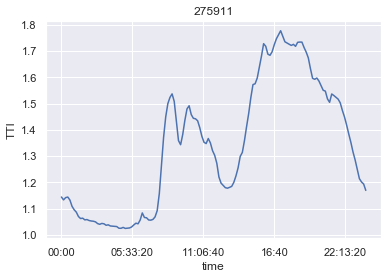

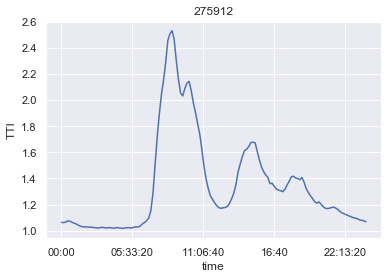

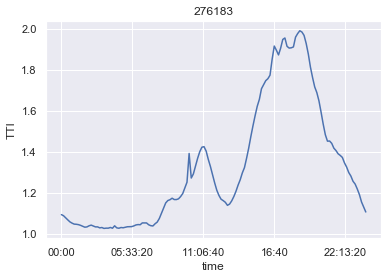

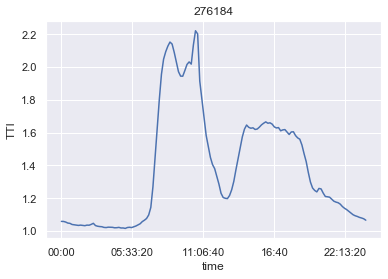

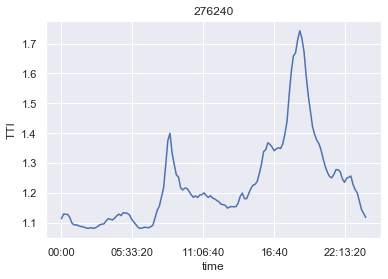

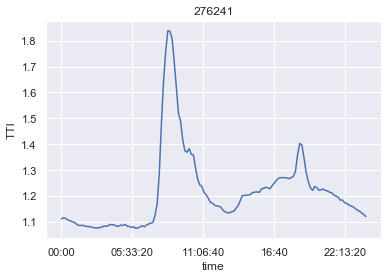

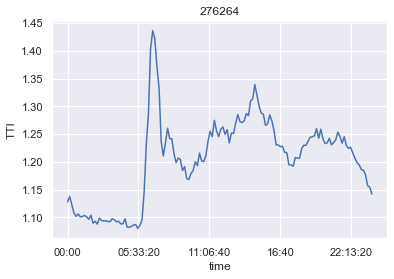

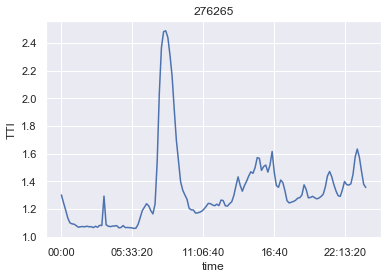

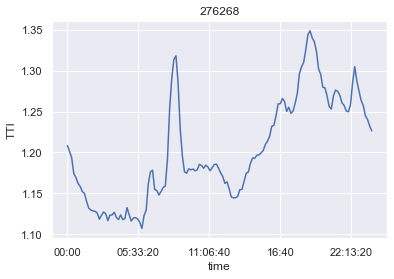

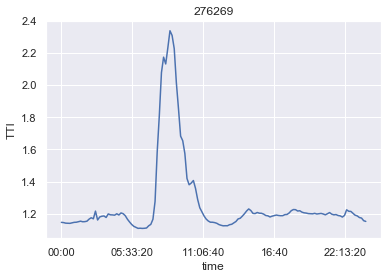

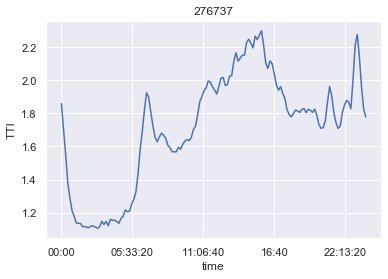

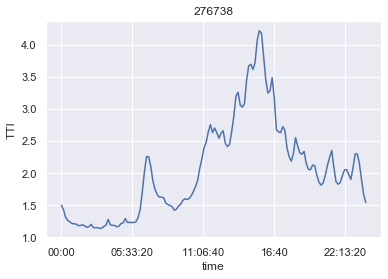

In [3]:
# 各路每天TTI可视化
for name, group in df1.groupby('id_road'):
    plt.figure()
    group.set_index('time', inplace=True)
    group.index = group.index.time
    group['TTI'].groupby(group.index).mean().plot()
    plt.ylabel('TTI')
    plt.title(name)
    plt.savefig(str(name) + '.jpg')

In [4]:
# 均值模型
models = pd.DataFrame({}, index=pd.date_range(0, periods=6*24, freq='10T').time)
for name, group in df1.groupby('id_road'):
    group.set_index('time', inplace=True)
    models[name] = group['TTI'].groupby(group.index.time).mean()
models

,275911,275912,276183,276184,276240,276241,276264,276265,276268,276269,276737,276738
00:00:00,1.144299,1.064104,1.094856,1.058592,1.113982,1.112167,1.127822,1.300990,1.208403,1.145723,1.858641,1.498657
00:10:00,1.133418,1.062797,1.089471,1.058228,1.129138,1.116470,1.137648,1.244426,1.201380,1.144303,1.703002,1.427311
00:20:00,1.142108,1.066669,1.079107,1.054677,1.128443,1.114090,1.122980,1.191343,1.193502,1.140786,1.549558,1.307054
00:30:00,1.144052,1.076056,1.069162,1.048454,1.127927,1.108078,1.108240,1.134036,1.174159,1.139887,1.379375,1.261284
00:40:00,1.132591,1.072317,1.059468,1.046638,1.116676,1.105805,1.101798,1.099524,1.169263,1.139518,1.288386,1.237827
...,...,...,...,...,...,...,...,...,...,...,...,...
23:10:00,1.249472,1.092400,1.220134,1.088836,1.200359,1.146241,1.185185,1.633175,1.257515,1.185850,2.276920,2.299979
23:20:00,1.214096,1.083911,1.192908,1.083161,1.172499,1.141923,1.176812,1.572771,1.244863,1.175790,2.140718,2.150708
23:30:00,1.201458,1.079850,1.156597,1.079374,1.144289,1.135694,1.157263,1.472129,1.240563,1.172346,1.960902,1.896395
23:40:00,1.193680,1.077772,1.131488,1.074755,1.131048,1.129266,1.154220,1.379015,1.232640,1.156172,1.826179,1.665321


In [5]:
# 预测结果
df2 = pd.read_csv('toPredict_noLabel.csv')
df2['time'] = pd.DatetimeIndex(df2['time']).time
df2['TTI'] = 0
for i in df2.index:
    df2.loc[i, 'TTI'] = models.loc[df2.loc[i, 'time'], df2.loc[i, 'id_road']]
# df2[['id_sample', 'TTI']].to_csv('submit1.csv', index=False)
df2

,id_sample,id_road,time,TTI
0,0,276183,08:30:00,1.167547
1,1,276183,08:40:00,1.174955
2,2,276183,08:50:00,1.168483
3,3,276183,10:30:00,1.332391
4,4,276183,10:40:00,1.369839
...,...,...,...,...
3019,3019,276738,19:10:00,2.155491
3020,3020,276738,19:20:00,2.061244
3021,3021,276738,21:00:00,2.246663
3022,3022,276738,21:10:00,2.354447


In [6]:
# 处理时间缺失
df3 = pd.DataFrame()
period1 = pd.date_range('2019-01-01 00:00:00', '2019-03-31 23:50:00', freq='10T')
period2 = pd.date_range('2019-10-01 00:00:00', '2019-12-21 23:50:00', freq='10T')
period = period1.append(period2)
for name, group in df1.groupby('id_road'):
    group.set_index('time', inplace=True)
    group = group.reindex(period, method='nearest')
    group['time'] = group.index
    group.reset_index(drop=True, inplace=True)
    df3 = df3.append(group)
# df3.to_csv('train_TTI_fillna.csv', index=False)
df3

,id_road,TTI,speed,time
0,275911,1.17708,61.1719,2019-01-01 00:00:00
1,275911,1.20540,59.7347,2019-01-01 00:10:00
2,275911,1.15301,62.4490,2019-01-01 00:20:00
3,275911,1.16649,61.7272,2019-01-01 00:30:00
4,275911,1.18073,60.9831,2019-01-01 00:40:00
...,...,...,...,...
24763,276738,1.44719,28.3267,2019-12-21 23:10:00
24764,276738,1.35854,30.1750,2019-12-21 23:20:00
24765,276738,1.37941,29.7186,2019-12-21 23:30:00
24766,276738,1.21284,33.7999,2019-12-21 23:40:00


In [7]:
# 6+3
id_road = df3['id_road'].unique()
index = pd.MultiIndex.from_product([id_road, period1.append(period2)])
df4 = pd.DataFrame(0, index=index, columns=list('123456789'))
for name, group in df3.groupby('id_road'):
    matrix = np.zeros((6*24*172, 9))
    group = group['TTI'].values
    i = 6
    for j in range(6, 6*24*90-2):
        matrix[i] = group[j-6:j+3]
        i += 1
    i += 8
    for j in range(6*24*90+6, 6*24*172-2):
        matrix[i] = group[j-6:j+3]
        i += 1
    df4.loc[name] = matrix
df4.index.names = ['id_road', 'time']
# df4.to_csv('train_TTI_6+3.csv')
df4

1        2        3        4        5  \
id_road time                                                               
275911  2019-01-01 00:00:00  0.00000  0.00000  0.00000  0.00000  0.00000   
        2019-01-01 00:10:00  0.00000  0.00000  0.00000  0.00000  0.00000   
        2019-01-01 00:20:00  0.00000  0.00000  0.00000  0.00000  0.00000   
        2019-01-01 00:30:00  0.00000  0.00000  0.00000  0.00000  0.00000   
        2019-01-01 00:40:00  0.00000  0.00000  0.00000  0.00000  0.00000   
...                              ...      ...      ...      ...      ...   
276738  2019-12-21 23:10:00  1.52142  1.53454  1.64355  1.65691  1.41686   
        2019-12-21 23:20:00  1.53454  1.64355  1.65691  1.41686  1.44202   
        2019-12-21 23:30:00  1.64355  1.65691  1.41686  1.44202  1.44719   
        2019-12-21 23:40:00  0.00000  0.00000  0.00000  0.00000  0.00000   
        2019-12-21 23:50:00  0.00000  0.00000  0.00000  0.00000  0.00000   

                                   6        7        8        9  
id_road time                                                     
275911  2019-01-01 00:00:00  0.00000  0.00000  0.00000  0.00000  
        2019-01-01 00:10:00  0.00000  0.00000  0.00000  0.00000  
        2019-01-01 00:20:00  0.00000  0.00000  0.00000  0.00000  
        2019-01-01 00:30:00  0.00000  0.00000  0.00000  0.00000  
        2019-01-01 00:40:00  0.00000  0.00000  0.00000  0.00000  
...                              ...      ...      ...      ...  
276738  2019-12-21 23:10:00  1.44202  1.44719  1.35854  1.37941  
        2019-12-21 23:20:00  1.44719  1.35854  1.37941  1.21284  
        2019-12-21 23:30:00  1.35854  1.37941  1.21284  1.21629  
        2019-12-21 23:40:00  0.00000  0.00000  0.00000  0.00000  
        2019-12-21 23:50:00  0.00000  0.00000  0.00000  0.00000  

[297216 rows x 9 columns]

In [8]:
# 6+3加强版，按路号和时刻索引
time = pd.date_range(0, periods=6*24, freq='10T').time
date = np.append(pd.date_range('2019-01-01', '2019-03-31').date, pd.date_range('2019-10-01', '2019-12-21').date)
df4.index = pd.MultiIndex.from_product([id_road, df4.index.levels[1].time])
df5 = pd.DataFrame(0, index=pd.MultiIndex.from_product([id_road, time, date]), columns=list('123456789'))
for name, group in df4.groupby(df4.index):
    df5.loc[name] = group.values
df5.index.names = ['id_road', 'time', 'date']
# df5.to_csv('train_TTI_6plus3.csv')
df5

1        2        3        4        5  \
id_road time     date                                                      
275911  00:00:00 2019-01-01  0.00000  0.00000  0.00000  0.00000  0.00000   
                 2019-01-02  1.14105  1.13699  1.12393  1.15026  1.13117   
                 2019-01-03  1.53843  1.29012  1.16313  1.13825  1.37852   
                 2019-01-04  1.20683  1.29577  1.24171  1.15601  1.14226   
                 2019-01-05  1.58394  1.47470  1.25195  1.15187  1.16729   
...                              ...      ...      ...      ...      ...   
276738  23:50:00 2019-12-17  1.21852  1.42880  1.36848  1.26464  1.25062   
                 2019-12-18  1.39183  1.42769  1.41937  1.32931  1.29322   
                 2019-12-19  1.26962  1.34787  1.25425  1.27220  1.23676   
                 2019-12-20  1.35850  1.50126  1.84028  1.62766  1.31815   
                 2019-12-21  0.00000  0.00000  0.00000  0.00000  0.00000   

                                   6        7        8        9  
id_road time     date                                            
275911  00:00:00 2019-01-01  0.00000  0.00000  0.00000  0.00000  
                 2019-01-02  1.11357  1.09580  1.10014  1.11471  
                 2019-01-03  1.91348  2.08315  2.04741  2.08087  
                 2019-01-04  1.15313  1.15265  1.30350  1.86703  
                 2019-01-05  1.18005  1.15340  1.14601  1.15873  
...                              ...      ...      ...      ...  
276738  23:50:00 2019-12-17  1.32827  1.24253  1.26758  1.31894  
                 2019-12-18  1.17574  1.28191  1.30337  1.18777  
                 2019-12-19  1.27166  1.22254  1.28557  1.17445  
                 2019-12-20  1.28073  1.38232  1.30534  1.19134  
                 2019-12-21  0.00000  0.00000  0.00000  0.00000  

[297216 rows x 9 columns]

In [9]:
# 去除异常点
df = pd.read_csv('train_TTI_6+6+3_more.csv')
for i in range(9):
    df = df[df['TTI'+str(i)] < 10]
df.to_csv('train_TTI_6+6+3_more_drop.csv', index=False)